# Stats+Machine Learning

- Basic statistics(basic)
- Regression analysis and outliers(regression)
- Tests of independence(independence)
- Analysis of variance(anova)
- Machine learning(machine)

# 1)- Importing key libraries

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [0]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
! pip install outliers

  ERROR: Could not find a version that satisfies the requirement outliers (from versions: none)
ERROR: No matching distribution found for outliers


In [0]:
# import required packages
import pandas as pd
import numpy as np
import scipy
# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#Smirnov Grubbs Tests
import smirnov_grubbs as grubbs

# 2)- Loading data

In [0]:
# format the data: covert to datetime, average precipitation per month, get month and year, reset index
df = pd.read_csv('la_jolla_precip_monthly.csv')


In [7]:
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES
0,US1CASD0015,"LA JOLLA 2.5SE, CA US",32.8254,-117.2397,154.8,2008-12,112.4,",,,N"
1,US1CASD0015,"LA JOLLA 2.5SE, CA US",32.8254,-117.2397,154.8,2009-01,6.9,",,,N"
2,US1CASD0015,"LA JOLLA 2.5SE, CA US",32.8254,-117.2397,154.8,2009-02,72.6,",,,N"
3,US1CASD0015,"LA JOLLA 2.5SE, CA US",32.8254,-117.2397,154.8,2009-03,6.1,",,,N"
4,US1CASD0015,"LA JOLLA 2.5SE, CA US",32.8254,-117.2397,154.8,2009-04,1.8,",,,N"


In [0]:
df = pd.read_csv('la_jolla_precip_monthly.csv')

In [0]:
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.groupby('DATE').mean()
df['MONTH'] = [x.month for x in df.index]
df['YEAR'] = [x.year for x in df.index]
df.reset_index(inplace=True)

In [10]:
df.head()

,DATE,LATITUDE,LONGITUDE,ELEVATION,PRCP,MONTH,YEAR
0,2008-12-01,32.82540,-117.2397,154.80,112.40,12,2008
1,2009-01-01,32.82540,-117.2397,154.80,6.90,1,2009
2,2009-02-01,32.82540,-117.2397,154.80,72.60,2,2009
3,2009-03-01,32.82555,-117.2449,152.25,6.10,3,2009
4,2009-04-01,32.82555,-117.2449,152.25,2.05,4,2009


In [11]:
df


,DATE,LATITUDE,LONGITUDE,ELEVATION,PRCP,MONTH,YEAR
0,2008-12-01,32.825400,-117.239700,154.80,112.400000,12,2008
1,2009-01-01,32.825400,-117.239700,154.80,6.900000,1,2009
2,2009-02-01,32.825400,-117.239700,154.80,72.600000,2,2009
3,2009-03-01,32.825550,-117.244900,152.25,6.100000,3,2009
4,2009-04-01,32.825550,-117.244900,152.25,2.050000,4,2009
5,2009-05-01,32.825550,-117.244900,152.25,4.850000,5,2009
6,2009-06-01,32.825550,-117.244900,152.25,3.850000,6,2009
7,2009-07-01,32.825550,-117.244900,152.25,0.000000,7,2009
8,2009-08-01,32.825550,-117.244900,152.25,0.400000,8,2009
9,2009-09-01,32.825550,-117.244900,152.25,0.550000,9,2009


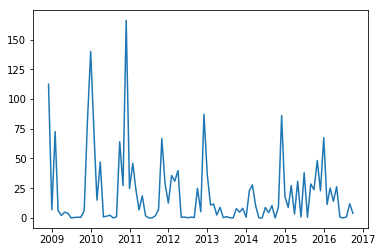

In [12]:
plt.plot(df.DATE, df.PRCP);

In [13]:
df.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,MONTH,YEAR
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,32.830764,-117.245553,147.555789,20.878070,6.452632,2012.378947
std,0.007165,0.001824,6.192505,30.779847,3.457242,2.302538
min,32.825400,-117.250100,139.200000,0.000000,1.000000,2008.000000
25%,32.825550,-117.245833,139.200000,0.850000,3.500000,2010.000000
50%,32.825550,-117.244900,152.250000,8.750000,6.000000,2012.000000
75%,32.840533,-117.244900,152.250000,27.116667,9.000000,2014.000000
max,32.840533,-117.239700,154.800000,166.200000,12.000000,2016.000000


In [14]:
df.mean

<bound method DataFrame.mean of          DATE   LATITUDE   LONGITUDE  ELEVATION        PRCP  MONTH  YEAR
0  2008-12-01  32.825400 -117.239700     154.80  112.400000     12  2008
1  2009-01-01  32.825400 -117.239700     154.80    6.900000      1  2009
2  2009-02-01  32.825400 -117.239700     154.80   72.600000      2  2009
3  2009-03-01  32.825550 -117.244900     152.25    6.100000      3  2009
4  2009-04-01  32.825550 -117.244900     152.25    2.050000      4  2009
5  2009-05-01  32.825550 -117.244900     152.25    4.850000      5  2009
6  2009-06-01  32.825550 -117.244900     152.25    3.850000      6  2009
7  2009-07-01  32.825550 -117.244900     152.25    0.000000      7  2009
8  2009-08-01  32.825550 -117.244900     152.25    0.400000      8  2009
9  2009-09-01  32.825550 -117.244900     152.25    0.550000      9  2009
10 2009-10-01  32.825550 -117.244900     152.25    0.500000     10  2009
11 2009-11-01  32.840533 -117.245833     139.20    6.133333     11  2009
12 2009-12-01  32.8

In [15]:
df.PRCP.mean()

20.87807017543859

In [16]:
df.PRCP.count()

95

In [17]:
df.PRCP.idxmin()

7

In [18]:
df.PRCP.idxmax()

24

In [19]:
df.PRCP.max()

166.2

In [20]:
df.PRCP

0     112.400000
1       6.900000
2      72.600000
3       6.100000
4       2.050000
5       4.850000
6       3.850000
7       0.000000
8       0.400000
9       0.550000
10      0.500000
11      6.133333
12     80.000000
13    140.000000
14     71.700000
15     14.966667
16     47.066667
17      0.900000
18      1.450000
19      2.250000
20      0.000000
21      0.966667
22     64.100000
23     27.033333
24    166.200000
25     24.633333
26     45.966667
27     24.500000
28      6.800000
29     18.533333
         ...    
65      0.000000
66      0.000000
67      8.750000
68      4.450000
69     10.300000
70      0.000000
71      9.250000
72     86.050000
73     18.100000
74      8.750000
75     27.200000
76      3.300000
77     30.850000
78      0.800000
79     38.050000
80      0.500000
81     28.600000
82     23.700000
83     48.250000
84     22.850000
85     67.500000
86     11.350000
87     25.100000
88     14.000000
89     26.200000
90      0.600000
91      0.000000
92      0.8000

In [21]:
df.DATE = df['DATE']
df

,DATE,LATITUDE,LONGITUDE,ELEVATION,PRCP,MONTH,YEAR
0,2008-12-01,32.825400,-117.239700,154.80,112.400000,12,2008
1,2009-01-01,32.825400,-117.239700,154.80,6.900000,1,2009
2,2009-02-01,32.825400,-117.239700,154.80,72.600000,2,2009
3,2009-03-01,32.825550,-117.244900,152.25,6.100000,3,2009
4,2009-04-01,32.825550,-117.244900,152.25,2.050000,4,2009
5,2009-05-01,32.825550,-117.244900,152.25,4.850000,5,2009
6,2009-06-01,32.825550,-117.244900,152.25,3.850000,6,2009
7,2009-07-01,32.825550,-117.244900,152.25,0.000000,7,2009
8,2009-08-01,32.825550,-117.244900,152.25,0.400000,8,2009
9,2009-09-01,32.825550,-117.244900,152.25,0.550000,9,2009


In [22]:
df.PRCP.round().value_counts()

0.0      16
1.0      12
2.0       5
9.0       4
7.0       3
25.0      3
5.0       3
4.0       3
12.0      3
11.0      2
24.0      2
29.0      2
36.0      2
31.0      2
27.0      2
8.0       2
23.0      2
10.0      2
6.0       2
80.0      1
64.0      1
140.0     1
72.0      1
15.0      1
73.0      1
47.0      1
26.0      1
19.0      1
166.0     1
46.0      1
14.0      1
67.0      1
40.0      1
87.0      1
28.0      1
86.0      1
18.0      1
3.0       1
38.0      1
48.0      1
68.0      1
112.0     1
Name: PRCP, dtype: int64

In [0]:
# Regression .....yepeeee

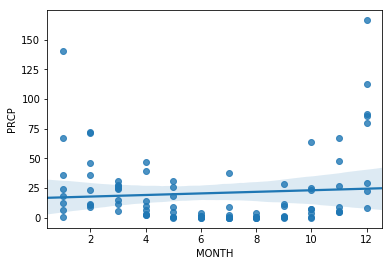

In [24]:
sns.regplot(x='MONTH', y='PRCP', data=df, order=1)

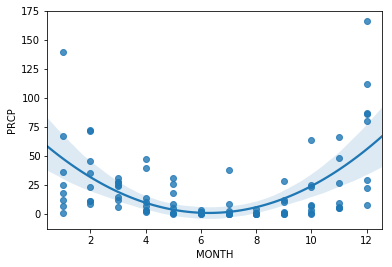

In [25]:
sns.regplot(x='MONTH', y='PRCP', data=df, order=2)

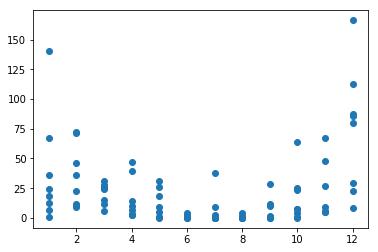

In [26]:
plt.scatter(x='MONTH', y='PRCP', data=df)

In [0]:
m, b = np.polyfit(df.MONTH, df.PRCP, 1)

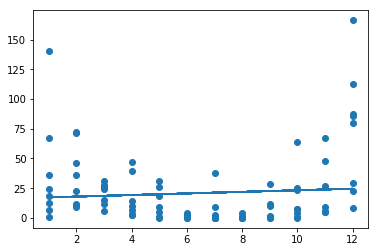

In [28]:
# plot scatter and polyfit
plt.scatter(df.MONTH, df.PRCP)
plt.plot(df.MONTH, m*df.MONTH + b, '-');

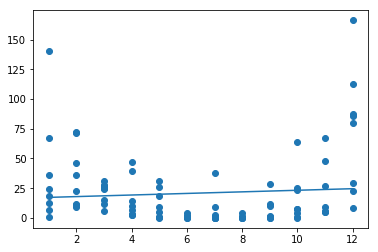

In [29]:
# sort DataFrame by month, then re-plot
df.sort_values('MONTH', inplace=True)
plt.scatter(df.MONTH, df.PRCP)
plt.plot(df.MONTH, m*df.MONTH + b, '-');

In [0]:
#2nd order

In [0]:

# 2nd order with np.polyfit
p = np.polyfit(df.MONTH, df.PRCP, 2)

In [32]:
# values of p are in decending orders
p

array([  1.68178223, -21.14169112,  67.38422486])

In [33]:
x1 = np.linspace(1,12)
x1

array([ 1.        ,  1.2244898 ,  1.44897959,  1.67346939,  1.89795918,
        2.12244898,  2.34693878,  2.57142857,  2.79591837,  3.02040816,
        3.24489796,  3.46938776,  3.69387755,  3.91836735,  4.14285714,
        4.36734694,  4.59183673,  4.81632653,  5.04081633,  5.26530612,
        5.48979592,  5.71428571,  5.93877551,  6.16326531,  6.3877551 ,
        6.6122449 ,  6.83673469,  7.06122449,  7.28571429,  7.51020408,
        7.73469388,  7.95918367,  8.18367347,  8.40816327,  8.63265306,
        8.85714286,  9.08163265,  9.30612245,  9.53061224,  9.75510204,
        9.97959184, 10.20408163, 10.42857143, 10.65306122, 10.87755102,
       11.10204082, 11.32653061, 11.55102041, 11.7755102 , 12.        ])

In [34]:
y1 = np.polyval(p, x1)
y1

array([47.92431598, 44.01806249, 40.28131809, 36.71408276, 33.31635652,
       30.08813935, 27.02943126, 24.14023226, 21.42054233, 18.87036149,
       16.48968972, 14.27852703, 12.23687342, 10.36472889,  8.66209345,
        7.12896708,  5.76534979,  4.57124158,  3.54664245,  2.6915524 ,
        2.00597143,  1.48989954,  1.14333673,  0.966283  ,  0.95873835,
        1.12070278,  1.45217628,  1.95315887,  2.62365054,  3.46365129,
        4.47316111,  5.65218002,  7.00070801,  8.51874507, 10.20629122,
       12.06334644, 14.08991075, 16.28598413, 18.6515666 , 21.18665814,
       23.89125877, 26.76536847, 29.80898725, 33.02211512, 36.40475206,
       39.95689808, 43.67855318, 47.56971737, 51.63039063, 55.86057297])

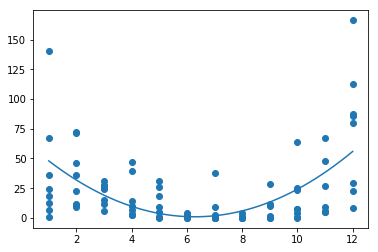

In [35]:
plt.scatter(df.MONTH, df.PRCP)
plt.plot(x1, y1, '-');

In [0]:
# 3rd order with np.polyfit
p = np.polyfit(df.MONTH, df.PRCP, 3)

In [37]:
p

array([ 0.2181916 , -2.5737477 ,  1.88384094, 37.59240367])

In [38]:
y1 = np.polyval(p, x1)
y1

array([37.12068851, 36.44072722, 35.58214074, 34.5597399 , 33.38833551,
       32.0827384 , 30.65775938, 29.12820928, 27.50889891, 25.81463909,
       24.06024064, 22.26051438, 20.43027113, 18.58432171, 16.73747694,
       14.90454764, 13.10034463, 11.33967872,  9.63736074,  8.00820151,
        6.46701184,  5.02860256,  3.70778448,  2.51936842,  1.47816521,
        0.59898566, -0.10335941, -0.61405918, -0.91830283, -1.00127954,
       -0.84817849, -0.44418886,  0.22550017,  1.17569941,  2.4212197 ,
        3.97687183,  5.85746665,  8.07781495, 10.65272758, 13.59701533,
       16.92548904, 20.65295952, 24.7942376 , 29.36413408, 34.3774598 ,
       39.84902557, 45.7936422 , 52.22612053, 59.16127136, 66.61390552])

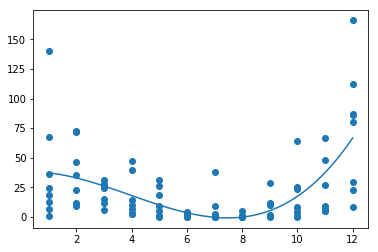

In [39]:
plt.scatter(df.MONTH, df.PRCP)
plt.plot(x1, y1, '-');

In [40]:
df_moons = pd.read_excel('moons.xlsx')
df_moons.head()

,moon_name,planet_name,moon_planet_distance_km,moon_diameter_km
0,Moon,Earth,384000,3476
1,Deimos,Mars,9270,20
2,Phobos,Mars,23460,8
3,Callisto,Jupiter,1883000,4800
4,Europa,Jupiter,670900,3126


In [41]:
df_planets = pd.read_excel('planets.xlsx')
df_planets.head()

,planet_name,planet_diameter_km,planet_sun_distance_km,planet_sun_distance_au
0,Earth,12742,1.495979e+08,1.000
1,Mars,6779,2.281368e+08,1.525
2,Jupiter,139822,7.786569e+08,5.205
3,Saturn,116464,1.427912e+09,9.545
4,Uranus,50724,2.872279e+09,19.200


In [0]:
df_solar = pd.merge(df_moons, df_planets, left_on='planet_name', right_on='planet_name')

In [43]:
df_solar.head()

,moon_name,planet_name,moon_planet_distance_km,moon_diameter_km,planet_diameter_km,planet_sun_distance_km,planet_sun_distance_au
0,Moon,Earth,384000,3476,12742,1.495979e+08,1.000
1,Deimos,Mars,9270,20,6779,2.281368e+08,1.525
2,Phobos,Mars,23460,8,6779,2.281368e+08,1.525
3,Callisto,Jupiter,1883000,4800,139822,7.786569e+08,5.205
4,Europa,Jupiter,670900,3126,139822,7.786569e+08,5.205


In [44]:
df_solar['moon_volume_km3'] = 4/3*np.pi*(df_solar.moon_diameter_km/2)**3
df_solar['planet_volume_km3'] = 4/3*np.pi*(df_solar.planet_diameter_km/2)**3
df_solar

,moon_name,planet_name,moon_planet_distance_km,moon_diameter_km,planet_diameter_km,planet_sun_distance_km,planet_sun_distance_au,moon_volume_km3,planet_volume_km3
0,Moon,Earth,384000,3476,12742,1.495979e+08,1.000,2.199064e+10,1.083207e+12
1,Deimos,Mars,9270,20,6779,2.281368e+08,1.525,4.188790e+03,1.631156e+11
2,Phobos,Mars,23460,8,6779,2.281368e+08,1.525,2.680826e+02,1.631156e+11
3,Callisto,Jupiter,1883000,4800,139822,7.786569e+08,5.205,5.790584e+10,1.431282e+15
4,Europa,Jupiter,670900,3126,139822,7.786569e+08,5.205,1.599431e+10,1.431282e+15
5,Ganymede,Jupiter,1070000,5276,139822,7.786569e+08,5.205,7.689763e+10,1.431282e+15
6,Io,Jupiter,421600,3629,139822,7.786569e+08,5.205,2.502416e+10,1.431282e+15
7,Dione,Saturn,377400,1120,116464,1.427912e+09,9.545,7.356186e+08,8.271299e+14
8,Enceladus,Saturn,238020,498,116464,1.427912e+09,9.545,6.466759e+07,8.271299e+14
9,Hyperion,Saturn,1481000,226,116464,1.427912e+09,9.545,6.043993e+06,8.271299e+14


# Correlation 

In [45]:
pearson_r_diameter, pearson_p_diameter = scipy.stats.pearsonr(df_solar.planet_diameter_km, df_solar.moon_diameter_km)
pearson_r_diameter, pearson_p_diameter

(0.39231409401451867, 0.06408634688502739)

In [46]:
pearson_r_volume, pearson_p_volume = scipy.stats.pearsonr(df_solar.planet_volume_km3, df_solar.moon_volume_km3)
pearson_r_volume, pearson_p_volume

(0.5186568153916278, 0.011223179377141755)

In [47]:
spearman_r_diameter, spearman_p_diameter = scipy.stats.spearmanr(df_solar.planet_diameter_km, df_solar.moon_diameter_km)
spearman_r_diameter, spearman_p_diameter

(0.453630792978124, 0.029697361455537457)

In [48]:
spearman_r_volume, spearman_p_volume = scipy.stats.spearmanr(df_solar.planet_volume_km3, df_solar.moon_volume_km3)
spearman_r_volume, spearman_p_volume

(0.453630792978124, 0.029697361455537457)

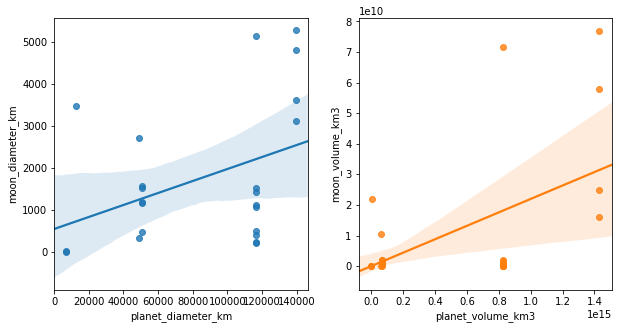

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.regplot(x='planet_diameter_km', y='moon_diameter_km', data=df_solar, ax=ax[0])
sns.regplot(x='planet_volume_km3', y='moon_volume_km3', data=df_solar, ax=ax[1]);

In [0]:
# calculate moon diameters and volumes relative to host planets
df_solar['moon_planet_relative_diameter'] = df_solar.moon_diameter_km/df_solar.planet_diameter_km
df_solar['moon_planet_relative_volume'] = df_solar.moon_volume_km3/df_solar.planet_volume_km3

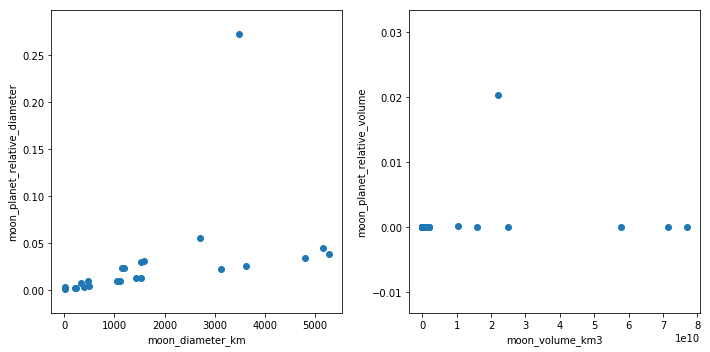

In [51]:
# plot scatter plots
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].scatter(df_solar.moon_diameter_km, df_solar.moon_planet_relative_diameter)
ax[0].set_xlabel('moon_diameter_km')
ax[0].set_ylabel('moon_planet_relative_diameter')

ax[1].scatter(df_solar.moon_volume_km3, df_solar.moon_planet_relative_volume)
ax[1].set_xlabel('moon_volume_km3')
ax[1].set_ylabel('moon_planet_relative_volume')

fig.tight_layout()

# plot distributions

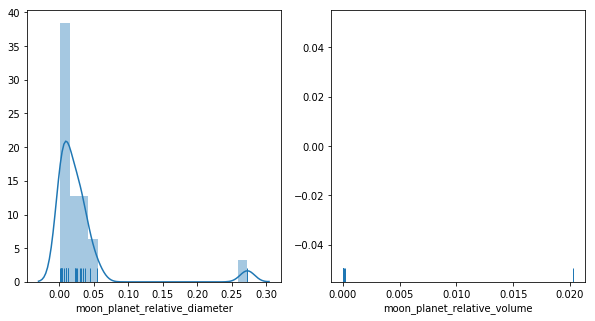

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(df_solar.moon_planet_relative_diameter, rug=True, bins=20, ax=ax[0])
sns.distplot(df_solar.moon_planet_relative_volume, hist=False, kde=False, rug=True, bins=20, ax=ax[1]);
#ax[1].set_xscale('log')

In [53]:
# print outliers from the dataset - relative diameter
grubbs.max_test_outliers(df_solar.moon_planet_relative_diameter, alpha=0.05)

[0.27279861874117095]

# Remove outliers

In [54]:
# remove outliers - relative diameter
moon_planet_rel_diam_no_outliers = grubbs.test(df_solar.moon_planet_relative_diameter, alpha=0.05)
moon_planet_rel_diam_no_outliers
# This alpha is p-value cutoff

1     0.002950
2     0.001180
3     0.034329
4     0.022357
5     0.037734
6     0.025954
7     0.009617
8     0.004276
9     0.001941
10    0.012330
11    0.003417
12    0.001889
13    0.013120
14    0.009102
15    0.044220
16    0.022869
17    0.009305
18    0.030084
19    0.031149
20    0.023460
21    0.006904
22    0.054931
Name: moon_planet_relative_diameter, dtype: float64

In [55]:
df_solar

,moon_name,planet_name,moon_planet_distance_km,moon_diameter_km,planet_diameter_km,planet_sun_distance_km,planet_sun_distance_au,moon_volume_km3,planet_volume_km3,moon_planet_relative_diameter,moon_planet_relative_volume
0,Moon,Earth,384000,3476,12742,1.495979e+08,1.000,2.199064e+10,1.083207e+12,0.272799,2.030142e-02
1,Deimos,Mars,9270,20,6779,2.281368e+08,1.525,4.188790e+03,1.631156e+11,0.002950,2.567989e-08
2,Phobos,Mars,23460,8,6779,2.281368e+08,1.525,2.680826e+02,1.631156e+11,0.001180,1.643513e-09
3,Callisto,Jupiter,1883000,4800,139822,7.786569e+08,5.205,5.790584e+10,1.431282e+15,0.034329,4.045733e-05
4,Europa,Jupiter,670900,3126,139822,7.786569e+08,5.205,1.599431e+10,1.431282e+15,0.022357,1.117482e-05
5,Ganymede,Jupiter,1070000,5276,139822,7.786569e+08,5.205,7.689763e+10,1.431282e+15,0.037734,5.372641e-05
6,Io,Jupiter,421600,3629,139822,7.786569e+08,5.205,2.502416e+10,1.431282e+15,0.025954,1.748374e-05
7,Dione,Saturn,377400,1120,116464,1.427912e+09,9.545,7.356186e+08,8.271299e+14,0.009617,8.893628e-07
8,Enceladus,Saturn,238020,498,116464,1.427912e+09,9.545,6.466759e+07,8.271299e+14,0.004276,7.818311e-08
9,Hyperion,Saturn,1481000,226,116464,1.427912e+09,9.545,6.043993e+06,8.271299e+14,0.001941,7.307187e-09


In [56]:
#IF WE WANT to see outlier positon and its number
df_solar.moon_planet_relative_diameter.max()

0.27279861874117095

In [57]:
df_solar.moon_planet_relative_diameter.idxmax()

0

In [58]:
# print outliers from the dataset - relative volume (higher alpha)
grubbs.max_test_outliers(df_solar.moon_planet_relative_volume, alpha=0.000005)

[0.02030142397437823]

In [59]:
# remove outliers - relative volume (higher alpha)
moon_planet_rel_vol_no_outliers = grubbs.test(df_solar.moon_planet_relative_volume, alpha=0.000005)
moon_planet_rel_vol_no_outliers

1     2.567989e-08
2     1.643513e-09
3     4.045733e-05
4     1.117482e-05
5     5.372641e-05
6     1.748374e-05
7     8.893628e-07
8     7.818311e-08
9     7.307187e-09
10    1.874512e-06
11    3.990930e-08
12    6.740513e-09
13    2.258369e-06
14    7.539499e-07
15    8.646624e-05
16    1.196006e-05
17    8.057225e-07
18    2.722846e-05
19    3.022253e-05
20    1.291220e-05
21    3.291371e-07
22    1.657455e-04
Name: moon_planet_relative_volume, dtype: float64